<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/Decision_Tree_AI_Track_Classification_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [29]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Import Data

In [30]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/AI Data/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Split

In [31]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [32]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Classifier Tree

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Prediction Using Decision Tree

In [34]:

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Performance of the model

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


# Model Visualization

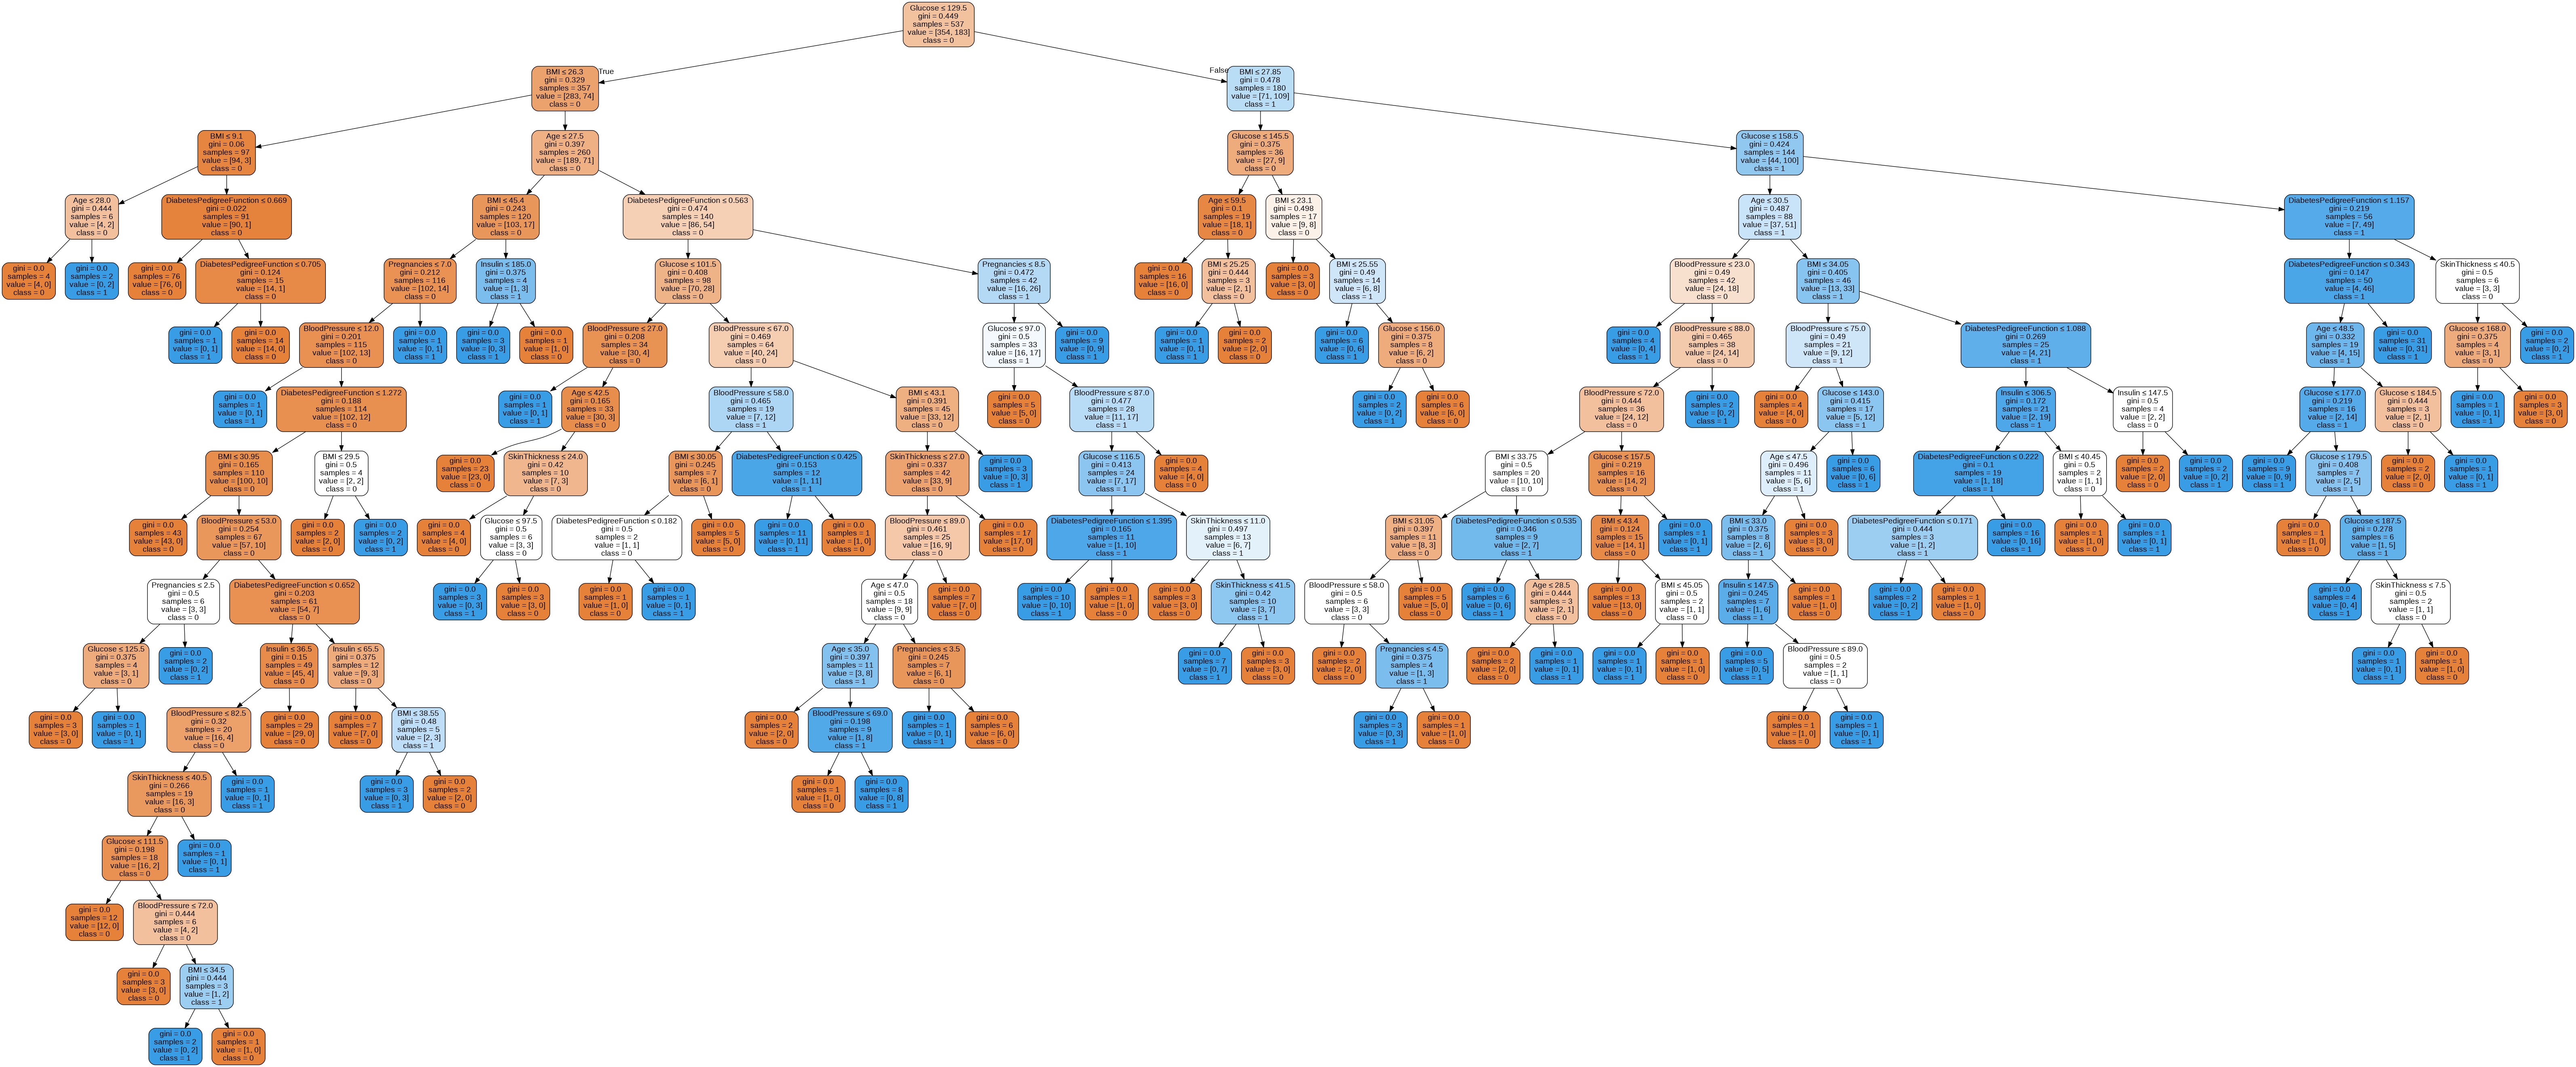

In [36]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

# Decision Tree Optimization

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


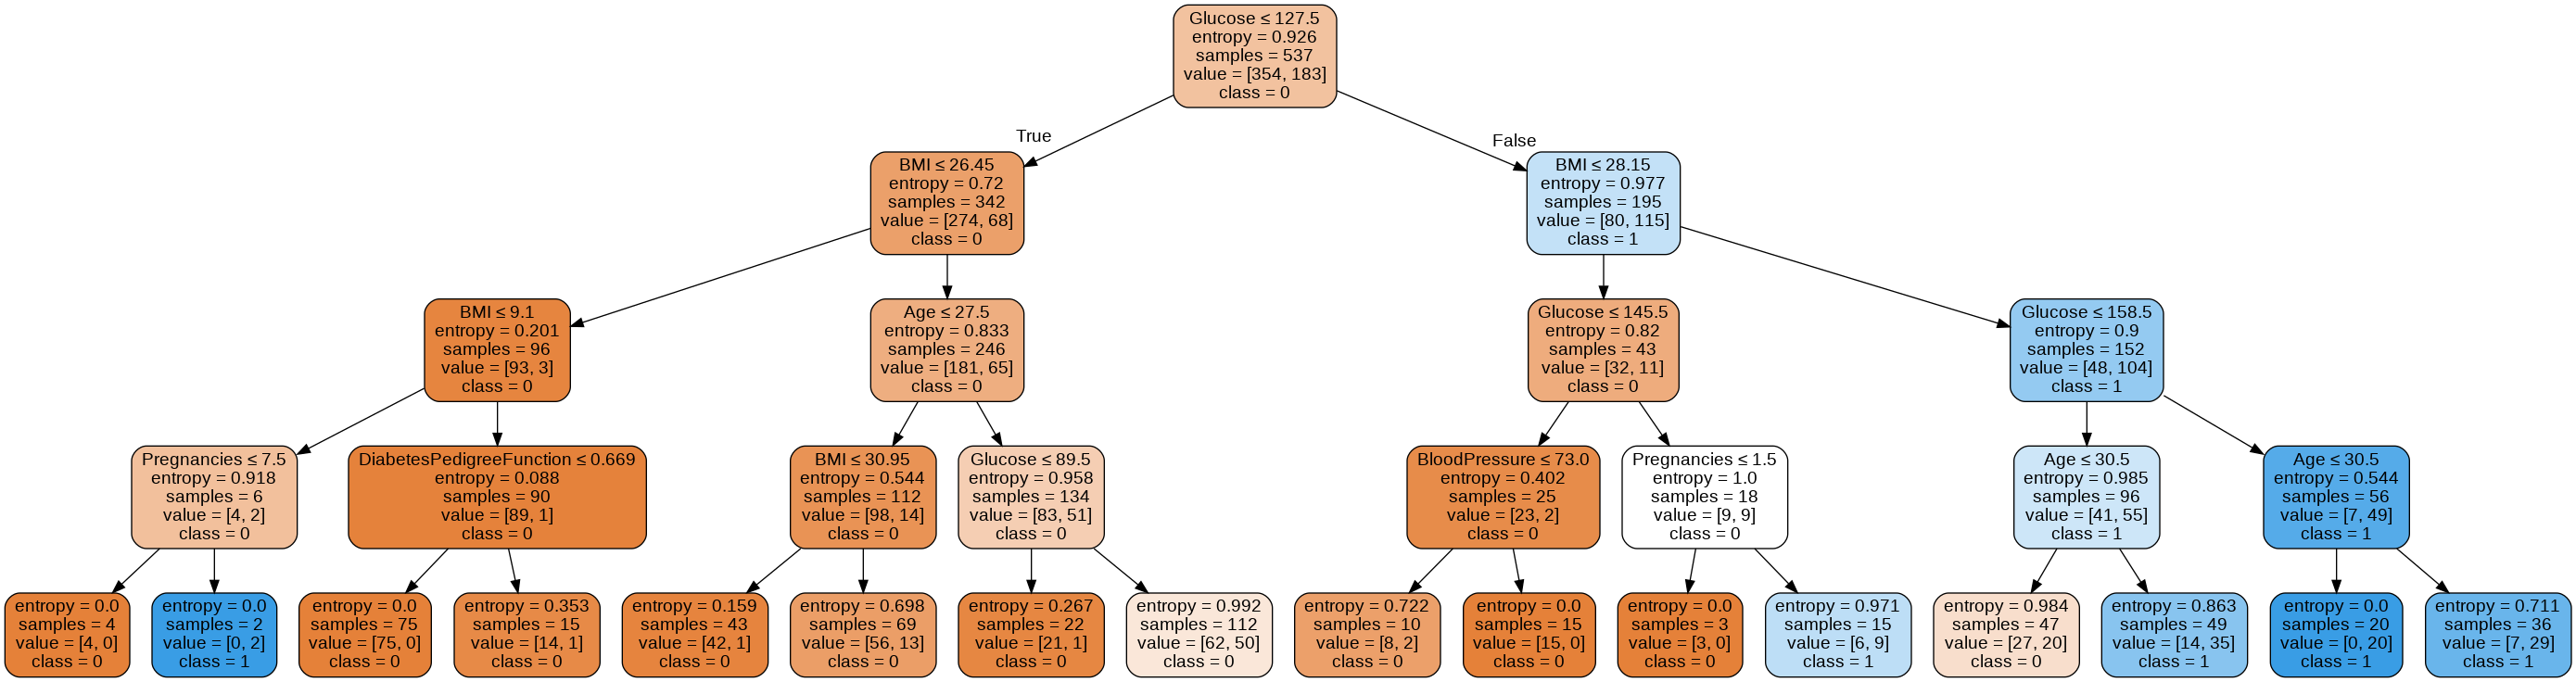

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#Save Model

In [39]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Deployment

In [40]:
list_of_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_data=pd.DataFrame(columns=list_of_columns)

input_data.at[0, 'Pregnancies'] = int(input('enter Pregnancies'))
input_data.at[0, 'Glucose'] = int(input('enter Glucose'))
input_data.at[0, 'BloodPressure'] = int(input('enter BloodPressure'))
input_data.at[0, 'SkinThickness'] = int(input('enter SkinThickness'))
input_data.at[0, 'Insulin'] = int(input('enter Insulin'))
input_data.at[0, 'BMI'] = float(input('enter BMI'))
input_data.at[0, 'DiabetesPedigreeFunction'] = float(input('enter DiabetesPedigreeFunction'))
input_data.at[0, 'Age'] = int(input('enter Age'))



model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict(input_data)
result = prediction[0]
print('Is diabetic',result)

enter Pregnancies6
enter Glucose148
enter BloodPressure72
enter SkinThickness35
enter Insulin0
enter BMI33.6
enter DiabetesPedigreeFunction0.627
enter Age51
Is diabetic 1


#Thank You

#Pros
Decision trees are easy to interpret and visualize.
It can easily capture, no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

#Cons
Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. 
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.